In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
acc = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
acc.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [13]:
for i in acc.columns: 
    if  acc[i].isnull().any():
     print('{0} has {1} null values'.format(i,acc[i].isnull().sum()))


TMC has 728071 null values
End_Lat has 2246264 null values
End_Lng has 2246264 null values
Description has 1 null values
Number has 1917605 null values
City has 83 null values
Zipcode has 880 null values
Timezone has 3163 null values
Airport_Code has 5691 null values
Weather_Timestamp has 36705 null values
Temperature(F) has 56063 null values
Wind_Chill(F) has 1852623 null values
Humidity(%) has 59173 null values
Pressure(in) has 48142 null values
Visibility(mi) has 65691 null values
Wind_Direction has 45101 null values
Wind_Speed(mph) has 440840 null values
Precipitation(in) has 1998358 null values
Weather_Condition has 65932 null values
Sunrise_Sunset has 93 null values
Civil_Twilight has 93 null values
Nautical_Twilight has 93 null values
Astronomical_Twilight has 93 null values


In [18]:
accidents=acc.dropna(subset=['City','Zipcode'])

In [19]:
accidents['Temperature(F)']= accidents['Temperature(F)'].fillna(accidents['Temperature(F)'].mean())
accidents['Wind_Chill(F)']= accidents['Wind_Chill(F)'].fillna(accidents['Wind_Chill(F)'].mean())
accidents['Humidity(%)']= accidents['Humidity(%)'].fillna(accidents['Humidity(%)'].mean())
accidents['Pressure(in)']= accidents['Pressure(in)'].fillna(accidents['Pressure(in)'].mean())
accidents['Visibility(mi)']= accidents['Visibility(mi)'].fillna(accidents['Visibility(mi)'].mean())
accidents['Wind_Speed(mph)']= accidents['Wind_Speed(mph)'].fillna(accidents['Wind_Speed(mph)'].mean())
accidents['Precipitation(in)']= accidents['Precipitation(in)'].fillna(accidents['Precipitation(in)'].mean())


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [20]:
accidents = accidents.drop(['End_Lat','End_Lng','Number'],axis=1)

In [24]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196799 entries, 0 to 2246263
Data columns (total 46 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Description              object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mph)          float64
Precipitation(

In [22]:
for i in accidents.columns: 
    if  accidents[i].isnull().any():
     print('{0} has {1} null values'.format(i,accidents[i].isnull().sum()))


TMC has 727420 null values
Description has 1 null values
Timezone has 2283 null values
Airport_Code has 4811 null values
Weather_Timestamp has 35824 null values
Wind_Direction has 44220 null values
Weather_Condition has 65046 null values
Sunrise_Sunset has 10 null values
Civil_Twilight has 10 null values
Nautical_Twilight has 10 null values
Astronomical_Twilight has 10 null values


In [23]:
accidents=accidents.dropna()

In [95]:
test_1 = accidents

In [96]:
test = test_1.sample(n=200000, random_state=101)

In [97]:
part_1 = test.select_dtypes(include=['float64','int64'])

part_1 = test.select_dtypes(include=['float64','int64'])

In [98]:
part_1 = part_1.astype('int64')

In [99]:
part_2 = test.select_dtypes(include=['object'])

In [100]:
part_3 = part_2.apply(LabelEncoder().fit_transform)

In [101]:
part_3['C'] = np.arange(len(part_3))

In [102]:
part_1['C'] = np.arange(len(part_1))

In [103]:
feature = pd.merge(left=part_1, right=part_3, how='left', left_on='C', right_on='C')

In [104]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 34 columns):
TMC                      200000 non-null int64
Severity                 200000 non-null int64
Start_Lat                200000 non-null int64
Start_Lng                200000 non-null int64
Distance(mi)             200000 non-null int64
Temperature(F)           200000 non-null int64
Wind_Chill(F)            200000 non-null int64
Humidity(%)              200000 non-null int64
Pressure(in)             200000 non-null int64
Visibility(mi)           200000 non-null int64
Wind_Speed(mph)          200000 non-null int64
Precipitation(in)        200000 non-null int64
C                        200000 non-null int32
ID                       200000 non-null int32
Source                   200000 non-null int32
Start_Time               200000 non-null int32
End_Time                 200000 non-null int32
Description              200000 non-null int32
Street                   200000 non-null in

In [19]:
#y= accidents['Severity']

In [105]:
feature_s = sample.drop(['Severity','C'],axis=1)

In [39]:
y = sample['Severity']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(feature_s, y, test_size=0.3, random_state=7)

In [107]:
from sklearn.feature_selection import mutual_info_classif

In [108]:
def select_features(X_train, y_train, X_test):
 K_best = SelectKBest(score_func=mutual_info_classif, k='all')
 K_best.fit(X_train, y_train)
 X_train_fscore = K_best.transform(X_train)
 X_test_fscore = K_best.transform(X_test)
 return X_train_fscore, X_test_fscore,K_best


In [109]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [110]:
from matplotlib import pyplot
 
for i in range(len(fs.scores_)):
 #ram = K_Best.scores_[i]>0.5
 print('Feature %d: %f' % (i, fs.scores_[i]>0.02))

 

Feature 0: 1.000000
Feature 1: 1.000000
Feature 2: 1.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 1.000000
Feature 12: 0.000000
Feature 13: 1.000000
Feature 14: 1.000000
Feature 15: 1.000000
Feature 16: 1.000000
Feature 17: 1.000000
Feature 18: 1.000000
Feature 19: 1.000000
Feature 20: 1.000000
Feature 21: 1.000000
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 1.000000
Feature 25: 1.000000
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000


In [111]:
feature_s.columns

Index(['TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'ID', 'Source', 'Start_Time',
       'End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [112]:
selected_feature = feature_s[['TMC', 'Start_Lat', 'Start_Lng','ID','Start_Time','End_Time', 'Description', 'Street', 'Side', 'City', 'County', 'State','Zipcode','Airport_Code', 'Weather_Timestamp']]

In [113]:
selected_feature.columns

Index(['TMC', 'Start_Lat', 'Start_Lng', 'ID', 'Start_Time', 'End_Time',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Airport_Code', 'Weather_Timestamp'],
      dtype='object')

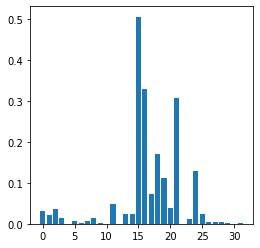

In [114]:
 #plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
pyplot.rcParams["figure.figsize"] = (4,4)

In [59]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(selected_feature, y, test_size=0.3, random_state=7)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
k=1
n=KNeighborsClassifier(n_neighbors=k).fit(X_train_e,y_train_e)


In [62]:
y_dash=n.predict(X_test_e)
y_dash[0:5]

array([3, 3, 3, 3, 3], dtype=int64)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 
import itertools
from sklearn.metrics import accuracy_score

In [64]:
k=10
mean_acc = np.zeros((k-1))
std_acc= np.zeros((k-1))
for n in range (1,k):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train_e,y_train_e)
    y_dash=neigh.predict(X_test_e)
    mean_acc[n-1]= metrics.accuracy_score(y_test_e,y_dash)
    
print( "The best accuracy was with KNN neighbor", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with KNN neighbor 0.8468166666666667 with k= 3


In [69]:
k=3
n=KNeighborsClassifier(n_neighbors=k).fit(X_train_e,y_train_e)
y_dash=n.predict(X_test_e)
accuracy = accuracy_score(y_test_e, y_dash)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.68


In [70]:
cnf_matrix_knn = confusion_matrix(y_test_e,  y_dash)

In [71]:
cnf_matrix_knn

array([[    0,    28,     4,     0],
       [    9, 34417,  4967,     1],
       [    1,  4051, 16392,     2],
       [    0,    34,    94,     0]], dtype=int64)

In [66]:
print (classification_report(y_test_e, y_dash))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.89      0.87      0.88     39394
           3       0.76      0.80      0.78     20446
           4       0.00      0.00      0.00       128

    accuracy                           0.85     60000
   macro avg       0.41      0.42      0.42     60000
weighted avg       0.85      0.85      0.85     60000



In [52]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion="entropy",max_depth=4)
dec

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
dec.fit(X_train_e,y_train_e)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
pred_tree = dec.predict(X_test_e)

In [55]:

from sklearn import metrics 
print("Decision Tree Classifier accuracy %2f" % metrics.accuracy_score(y_test_e,pred_tree))

Decision Tree Classifier accuracy 0.851717


In [56]:
pred_tree

array([3, 2, 3, ..., 2, 2, 3], dtype=int64)

In [87]:
cnf_matrix_c = confusion_matrix(y_test_e, pred_tree)
print(cnf_matrix_c)

[[    0    30     2     0]
 [    0 34736  4658     0]
 [    0  4079 16367     0]
 [    0    29    99     0]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf_a = RandomForestClassifier()
>>> clf_a.fit(X_train_e, y_train_e)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
pred_a = clf_a.predict(X_test_e)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 
import itertools
from sklearn.metrics import accuracy_score

In [43]:
accuracy_a = accuracy_score(y_test_e, pred_a)
print('Accuracy: %.2f' % (accuracy_a*100))

Accuracy: 91.37


In [44]:
cnf_matrix_d = confusion_matrix(y_test_e, pred_a)
print(cnf_matrix_d)

[[    0    31     1     0]
 [    1 37444  1949     0]
 [    0  3066 17375     5]
 [    0    26   101     1]]


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
state = 12  
test_size = 0.30  
  
X_train, X_value, y_train, y_value = train_test_split(X_train_e, y_train_e,  
    test_size=test_size, random_state=state)

In [52]:
list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in list:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb.fit(X_train_e, y_train_e)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_value, y_value)))

Learning rate:  0.05
Accuracy score (training): 0.671
Accuracy score (validation): 0.672
Learning rate:  0.075
Accuracy score (training): 0.723
Accuracy score (validation): 0.723
Learning rate:  0.1
Accuracy score (training): 0.759
Accuracy score (validation): 0.757
Learning rate:  0.25
Accuracy score (training): 0.818
Accuracy score (validation): 0.819
Learning rate:  0.5
Accuracy score (training): 0.839
Accuracy score (validation): 0.838
Learning rate:  0.75
Accuracy score (training): 0.867
Accuracy score (validation): 0.866
Learning rate:  1
Accuracy score (training): 0.418
Accuracy score (validation): 0.420


In [56]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, random_state=0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_value)

print("Confusion Matrix:")
print(confusion_matrix(y_value, predictions))

print("Classification Report")
print(classification_report(y_value, predictions))

Confusion Matrix:
[[    0    16     1     0]
 [    2 25999  1597     6]
 [    1  1459 12818    12]
 [    0    17    72     0]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.95      0.94      0.94     27604
           3       0.88      0.90      0.89     14290
           4       0.00      0.00      0.00        89

    accuracy                           0.92     42000
   macro avg       0.46      0.46      0.46     42000
weighted avg       0.92      0.92      0.92     42000



In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [73]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [74]:
model = clf.fit(X_train_e,y_train_e)

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [75]:
r=model.predict(X_test_e)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 
import itertools
from sklearn.metrics import accuracy_score

In [77]:
accuracy_b = accuracy_score(y_test_e, r)
print('Accuracy: %.2f' % (accuracy_b*100))

Accuracy: 69.00


In [79]:
cnf_matrix_logistic = confusion_matrix(y_test_e,r)

In [80]:
cnf_matrix_logistic

array([[    0,    30,     2,     0],
       [    0, 35331,  4063,     0],
       [    0, 14375,  6071,     0],
       [    0,    94,    34,     0]], dtype=int64)

In [85]:
print (classification_report(y_test_e,r))
print("Multinomial Logistic Regression: %.2f " % metrics.accuracy_score(y_test_e,r))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.71      0.90      0.79     39394
           3       0.60      0.30      0.40     20446
           4       0.00      0.00      0.00       128

    accuracy                           0.69     60000
   macro avg       0.33      0.30      0.30     60000
weighted avg       0.67      0.69      0.66     60000

Multinomial Logistic Regression: 0.69 


In [86]:
accidents.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [126]:
test['Street'].value_counts()

I-95 N                1747
I-5 N                 1607
I-95 S                1443
I-10 E                1307
I-10 W                1258
                      ... 
US Highway 17 92 N       1
State Highway 64         1
Overcup Dr               1
Van Wig Ave              1
A.W. Grimes Blvd         1
Name: Street, Length: 39693, dtype: int64